In [ ]:
##################################################################################################
###################################Simultion World Cup 2018#######################################
##################################################################################################

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(42)

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (12, 12)

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats
from scipy.stats import poisson

# Stats Models
import statsmodels.api as sm
import statsmodels.formula.api as smf
import itertools
from IPython.display import display, HTML
import random

In [2]:
# Standard ML Models for comparison
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor


# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy
from scipy.stats import pearsonr

from itertools import product

In [3]:
#Loading WorldCup_Matches_Test
WorldCup_Matches_Test = pd.read_excel('WorldCup_Matches_Test.xlsx')

In [4]:
#Loading WorldCup_Matches_Analytics
WorldCup_Matches_Analytics = pd.read_excel('WorldCup_Matches_Analytics.xlsx')

In [5]:
#Loading Qualified_Teams_WC2018
Qualified_Teams_WC2018 = pd.read_excel('Qualified_Teams_WC2018.xlsx')

In [6]:
#Loading WorldCup2018_Analytics_Home_32 & WorldCup2018_Analytics_Away_32
WorldCup2018_Analytics_Home_32 = pd.read_excel('WorldCup2018_Analytics_Home_32.xlsx')
WorldCup2018_Analytics_Away_32 = pd.read_excel('WorldCup2018_Analytics_Away_32.xlsx')

In [7]:
#Loading Training and Test for Neural Network Modelling X_train, y_train, X_test, y_test
X_train = pd.read_excel('X_train.xlsx')
y_train = X_train['Goal_Diff']

X_test = pd.read_excel('X_test.xlsx')
y_test = X_test['Goal_Diff']

In [8]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(34660, 43) (34660,)
(2797, 43) (2797,)


In [9]:
#NEURAL NETWORKS REGRESSOR
X_train = X_train.drop(columns='Goal_Diff')
X_test = X_test.drop(columns='Goal_Diff')
neural_network_reg = MLPRegressor(activation='relu', alpha=3e-05, batch_size='auto', beta_1=0.9, beta_2=0.999, 
                          early_stopping=False, epsilon=1e-08, hidden_layer_sizes=(10,), learning_rate='adaptive', 
                          learning_rate_init=0.1, max_iter=200, momentum=0.9, nesterovs_momentum=True, power_t=0.5, 
                          random_state=None, shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1, 
                          verbose=False, warm_start=False)
neural_network_reg.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=3e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='adaptive',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [10]:
#Neural Network root-mean-square error (RMSE)
y_pred3 = neural_network_reg.predict(X_test)
neural_network_mse = mean_squared_error(y_pred3, y_test)
neural_network_rmse = np.sqrt(neural_network_mse)
print('Neural Network RMSE: %.4f' % neural_network_rmse)

Neural Network RMSE: 1.7263


In [11]:
#Neural Network mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error
neural_network_mae = mean_absolute_error(y_pred3, y_test)
print('Neural Network MAE: %.4f' % neural_network_mae)

Neural Network MAE: 1.3187


In [ ]:
##################################################################################################
##################Simulation World Cup 2018 without Probability (Just one Run)####################
##################################################################################################

In [12]:
#Predicted goal difference for the 992 possible matches of the FIFA World Cup 2018
Pred_Goal_Diff = neural_network_reg.predict(WorldCup_Matches_Test)
Pred_Goal_Diff=pd.DataFrame(Pred_Goal_Diff)
Pred_Goal_Diff.columns = ['Pred_Goal_Diff']
Pred_Goal_Diff = Pred_Goal_Diff['Pred_Goal_Diff']

In [13]:
print(Pred_Goal_Diff)

0      0.765276
1      0.439646
2      1.678113
3      1.757060
4      1.714677
5      0.578021
6      0.960239
7      1.646139
8      0.699387
9      1.470138
10     1.048646
11     1.925547
12     1.412553
13     1.634847
14     0.137156
15     1.970429
16     1.419595
17     0.577103
18     0.899349
19     1.810916
20     1.576379
21     0.771588
22     0.661001
23     1.743204
24     0.388669
25     0.054706
26     1.530404
27     1.203431
28     0.600821
29     1.514735
         ...   
962   -0.031377
963    0.390214
964    0.289025
965   -0.998247
966   -0.470172
967    0.215728
968   -0.943463
969   -0.239352
970   -0.381765
971    0.296480
972   -0.069683
973    0.204436
974   -1.376545
975    0.297531
976   -0.010816
977   -0.906848
978   -0.545825
979    0.505564
980    0.145968
981   -0.937902
982   -0.908270
983    0.369190
984   -1.100248
985   -1.608392
986    0.099993
987   -0.226980
988   -0.829590
989   -0.143215
990   -1.171900
991   -1.219055
Name: Pred_Goal_Diff, Le

In [14]:
#Create Table with Matches and their prediction
WorldCup_Matches_2 = WorldCup_Matches_Analytics[['Home_Team_Fifa_Code','Away_Team_Fifa_Code',
                                                          'Draw_Home','Draw_Away']].reset_index()

WorldCup_Matches_Prediction = pd.concat([WorldCup_Matches_2, Pred_Goal_Diff], axis=1)

In [15]:
WorldCup_Matches_Prediction.head()

,index,Home_Team_Fifa_Code,Away_Team_Fifa_Code,Draw_Home,Draw_Away,Pred_Goal_Diff
0,0,RUS,KSA,A1,A2,0.765276
1,1,EGY,KSA,A3,A2,0.439646
2,2,URU,KSA,A4,A2,1.678113
3,3,POR,KSA,B1,A2,1.757060
4,4,ESP,KSA,B2,A2,1.714677


In [17]:
#Filter WorldCup_Matches_Test Team
#A='RUS', 'KSA', 'EGY', 'URU',
#B='POR', 'ESP', 'MAR', 'IRN',
#C='FRA', 'AUS', 'PER', 'DEN',
#D='ARG', 'ISL', 'CRO', 'NGA',
#E='BRA', 'SUI', 'CRC', 'SRB',
#F='GER', 'SWE', 'MEX', 'KOR',
#G='BEL', 'PAN', 'TUN', 'ENG',
#H='POL', 'SEN', 'COL', 'JPN',
WorldCup_Matches_Prediction_Filter = WorldCup_Matches_Prediction[(WorldCup_Matches_Prediction['Home_Team_Fifa_Code']=='FRA') & 
                                                        (WorldCup_Matches_Prediction['Away_Team_Fifa_Code']=='CRO')]
WorldCup_Matches_Prediction_Filter.head()

,index,Home_Team_Fifa_Code,Away_Team_Fifa_Code,Draw_Home,Draw_Away,Pred_Goal_Diff
410,410,FRA,CRO,C1,D3,0.266631


In [18]:
#Output of Simulation of the World Cup 2018 with the 992 possible matches
WorldCup_Matches_Prediction.to_csv('WorldCup_Matches_Prediction.csv')

In [ ]:
##################################################################################################
##################Simulation World Cup 2018 with Probability (8000 Runs)##########################
##################################################################################################

In [19]:
#Create Data to predict probability
Qualified_Teams_WC2018_1 = Qualified_Teams_WC2018['Home_Team_Fifa_Code']
Qualified_Teams_WC2018_2 = Qualified_Teams_WC2018['Away_Team_Fifa_Code']

In [20]:
WorldCup_Matches_p = pd.DataFrame(list(product(Qualified_Teams_WC2018_1, Qualified_Teams_WC2018_2)), 
             columns=['Home_Team_Fifa_Code', 'Away_Team_Fifa_Code'])

#Selec rows where Home_Team_Fifa_Code == Away_Team_Fifa_Code
#WorldCup_Matches_p = WorldCup_Matches_p[WorldCup_Matches_p.Home_Team_Fifa_Code == WorldCup_Matches.Away_Team_Fifa_Code ]

WorldCup_Matches_p = WorldCup_Matches_p[(WorldCup_Matches_p['Home_Team_Fifa_Code']== WorldCup_Matches_p['Away_Team_Fifa_Code'] ) & 
                                                        (WorldCup_Matches_p['Away_Team_Fifa_Code']== WorldCup_Matches_p['Home_Team_Fifa_Code'] )].reset_index()
WorldCup_Matches_p = WorldCup_Matches_p.drop('index', 1)

In [21]:
WorldCup_Matches_p

,Home_Team_Fifa_Code,Away_Team_Fifa_Code
0,RUS,RUS
1,KSA,KSA
2,EGY,EGY
3,URU,URU
4,POR,POR
5,ESP,ESP
6,MAR,MAR
7,IRN,IRN
8,FRA,FRA
9,AUS,AUS


In [22]:
#Creation one dataset with the statistics of the matches played at home and away for the 32 teams classified to the WC 2018
#Home
WorldCup_Matches_Analytics_p = WorldCup_Matches_p.merge(WorldCup2018_Analytics_Home_32, 
                        left_on=['Home_Team_Fifa_Code'], 
                        right_on=['Home_Team_Fifa_Code'])

#Away
WorldCup2018_Analytics_Away_32 =  WorldCup2018_Analytics_Away_32[['Away_Team_Fifa_Code',
                                                          'Away_Conf_Weight','Away',
                                                          'Away_Team_UEFA','last5games_w_per_away',
                                                           'last10games_w_per_away','last20games_w_per_away',
                                                           'last5games_l_per_away','last10games_l_per_away',
                                                          'last20games_l_per_away','last5games_d_per_away',
                                                          'last10games_d_per_away','last20games_d_per_away',
                                                          'last5games_gd_per_away','last10games_gd_per_away',
                                                          'last20games_gd_per_away','last5games_opp_cc_per_away',
                                                           'last10games_opp_cc_per_away','last20games_opp_cc_per_away']]

WorldCup_Matches_Analytics_p = WorldCup_Matches_Analytics_p.merge(WorldCup2018_Analytics_Away_32, 
                        left_on=['Away_Team_Fifa_Code'], 
                        right_on=['Away_Team_Fifa_Code'])

In [23]:
WorldCup_Matches_Analytics_p = WorldCup_Matches_Analytics_p.drop('Away_Team_Fifa_Code', 1)

In [24]:
WorldCup_Matches_Analytics_p = WorldCup_Matches_Analytics_p.rename(columns={'Home_Team_Fifa_Code':'name'})

In [25]:
WorldCup_Matches_Analytics_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 43 columns):
name                           32 non-null object
Tournament_Weight              32 non-null int64
Friendly                       32 non-null bool
Qualification                  32 non-null bool
Final                          32 non-null bool
FIFAWorldCup                   32 non-null bool
Home_Conf_Weight               32 non-null float64
Home                           32 non-null bool
Date_Weight                    32 non-null int64
Home_Team_UEFA                 32 non-null int64
last5games_w_per_home          32 non-null float64
last10games_w_per_home         32 non-null float64
last20games_w_per_home         32 non-null float64
last5games_l_per_home          32 non-null float64
last10games_l_per_home         32 non-null float64
last20games_l_per_home         32 non-null float64
last5games_d_per_home          32 non-null float64
last10games_d_per_home         32 non-null float64
l

In [49]:
#Without random_scale
def match(WorldCup_Matches_Analytics_p, team1, team2, model):
    
    match = pd.DataFrame(columns=['Tournament_Weight','Friendly',
                                    'Qualification','Final','FIFAWorldCup',
                                    'Home_Conf_Weight', 'Away_Conf_Weight',
                                    'Home','Away','Date_Weight',
                                    'Home_Team_UEFA','Away_Team_UEFA',
                                    'last5games_w_per_home',
                                    'last10games_w_per_home','last20games_w_per_home',
                                    'last5games_l_per_home','last10games_l_per_home',
                                    'last20games_l_per_home','last5games_d_per_home',
                                    'last10games_d_per_home','last20games_d_per_home',
                                    'last5games_gd_per_home','last10games_gd_per_home',
                                    'last20games_gd_per_home','last5games_opp_cc_per_home',
                                    'last10games_opp_cc_per_home','last20games_opp_cc_per_home',                  
                                    'last5games_w_per_away',
                                    'last10games_w_per_away','last20games_w_per_away',
                                    'last5games_l_per_away','last10games_l_per_away',
                                    'last20games_l_per_away','last5games_d_per_away',
                                    'last10games_d_per_away','last20games_d_per_away',
                                    'last5games_gd_per_away','last10games_gd_per_away',
                                    'last20games_gd_per_away','last5games_opp_cc_per_away',
                                    'last10games_opp_cc_per_away','last20games_opp_cc_per_away'], index=[0])
    
    match['Tournament_Weight'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['Tournament_Weight'].iloc[0]
    match['Friendly'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['Friendly'].iloc[0]
    match['Qualification'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['Qualification'].iloc[0]
    match['Final'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['Final'].iloc[0]
    match['FIFAWorldCup'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['FIFAWorldCup'].iloc[0]
    match['Home_Conf_Weight'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['Home_Conf_Weight'].iloc[0]
    match['Home'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['Home'].iloc[0]
    match['Date_Weight'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['Date_Weight'].iloc[0]
    match['Home_Team_UEFA'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['Home_Team_UEFA'].iloc[0]
    match['last5games_w_per_home'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last5games_w_per_home'].iloc[0]
    match['last10games_w_per_home'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last10games_w_per_home'].iloc[0]
    match['last20games_w_per_home'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last20games_w_per_home'].iloc[0]
    match['last5games_l_per_home'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last5games_l_per_home'].iloc[0]
    match['last10games_l_per_home'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last10games_l_per_home'].iloc[0]
    match['last20games_l_per_home'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last20games_l_per_home'].iloc[0]
    match['last5games_d_per_home'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last5games_d_per_home'].iloc[0]
    match['last10games_d_per_home'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last10games_d_per_home'].iloc[0]
    match['last20games_d_per_home'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last20games_d_per_home'].iloc[0]
    match['last5games_gd_per_home'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last5games_gd_per_home'].iloc[0]
    match['last10games_gd_per_home'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last10games_gd_per_home'].iloc[0]
    match['last20games_gd_per_home'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last20games_gd_per_home'].iloc[0]
    match['last5games_opp_cc_per_home'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last5games_opp_cc_per_home'].iloc[0]
    match['last10games_opp_cc_per_home'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last10games_opp_cc_per_home'].iloc[0]
    match['last20games_opp_cc_per_home'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last20games_opp_cc_per_home'].iloc[0]
        
    match['Away_Conf_Weight'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['Away_Conf_Weight'].iloc[0]
    match['Away'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['Away'].iloc[0]
    match['Away_Team_UEFA'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['Away_Team_UEFA'].iloc[0]
    match['last5games_w_per_away'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last5games_w_per_away'].iloc[0]
    match['last10games_w_per_away'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last10games_w_per_away'].iloc[0]
    match['last20games_w_per_away'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last20games_w_per_away'].iloc[0]
    match['last5games_l_per_away'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last5games_l_per_away'].iloc[0]
    match['last10games_l_per_away'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last10games_l_per_away'].iloc[0]
    match['last20games_l_per_away'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last20games_l_per_away'].iloc[0]
    match['last5games_d_per_away'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last5games_d_per_away'].iloc[0]
    match['last10games_d_per_away'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last10games_d_per_away'].iloc[0]
    match['last20games_d_per_away'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last20games_d_per_away'].iloc[0]
    match['last5games_gd_per_away'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last5games_gd_per_away'].iloc[0]
    match['last10games_gd_per_away'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last10games_gd_per_away'].iloc[0]
    match['last20games_gd_per_away'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last20games_gd_per_away'].iloc[0]
    match['last5games_opp_cc_per_away'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last5games_opp_cc_per_away'].iloc[0]
    match['last10games_opp_cc_per_away'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last10games_opp_cc_per_away'].iloc[0]
    match['last20games_opp_cc_per_away'] = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last20games_opp_cc_per_away'].iloc[0]
    
      
    match = match[['Tournament_Weight','Friendly',
                    'Qualification','Final','FIFAWorldCup',
                    'Home_Conf_Weight', 'Away_Conf_Weight',
                    'Home','Away','Date_Weight',
                    'Home_Team_UEFA','Away_Team_UEFA',
                    'last5games_w_per_home',
                    'last10games_w_per_home','last20games_w_per_home',
                    'last5games_l_per_home','last10games_l_per_home',
                    'last20games_l_per_home','last5games_d_per_home',
                    'last10games_d_per_home','last20games_d_per_home',
                    'last5games_gd_per_home','last10games_gd_per_home',
                    'last20games_gd_per_home','last5games_opp_cc_per_home',
                    'last10games_opp_cc_per_home','last20games_opp_cc_per_home',                  
                    'last5games_w_per_away',
                    'last10games_w_per_away','last20games_w_per_away',
                    'last5games_l_per_away','last10games_l_per_away',
                    'last20games_l_per_away','last5games_d_per_away',
                    'last10games_d_per_away','last20games_d_per_away',
                    'last5games_gd_per_away','last10games_gd_per_away',
                    'last20games_gd_per_away','last5games_opp_cc_per_away',
                    'last10games_opp_cc_per_away','last20games_opp_cc_per_away']]
    
    match_array = match.values
    
    prediction = model.predict(match_array)

    winner = None
    
    if prediction > 0:
        winner = team1
    elif prediction < 0:
        winner = team2
    
    return winner


In [235]:
match(WorldCup_Matches_Analytics_p, 'FRA', 'CRO', neural_network_reg)

'FRA'

In [216]:
#With random_scale
def match(WorldCup_Matches_Analytics_p, team1, team2, model, random_scale=0.08):
 
    match = pd.DataFrame(columns=['Tournament_Weight','Friendly',
                                    'Qualification','Final','FIFAWorldCup',
                                    'Home_Conf_Weight', 'Away_Conf_Weight',
                                    'Home','Away','Date_Weight',
                                    'Home_Team_UEFA','Away_Team_UEFA',
                                    'last5games_w_per_home',
                                    'last10games_w_per_home','last20games_w_per_home',
                                    'last5games_l_per_home','last10games_l_per_home',
                                    'last20games_l_per_home','last5games_d_per_home',
                                    'last10games_d_per_home','last20games_d_per_home',
                                    'last5games_gd_per_home','last10games_gd_per_home',
                                    'last20games_gd_per_home','last5games_opp_cc_per_home',
                                    'last10games_opp_cc_per_home','last20games_opp_cc_per_home',                  
                                    'last5games_w_per_away',
                                    'last10games_w_per_away','last20games_w_per_away',
                                    'last5games_l_per_away','last10games_l_per_away',
                                    'last20games_l_per_away','last5games_d_per_away',
                                    'last10games_d_per_away','last20games_d_per_away',
                                    'last5games_gd_per_away','last10games_gd_per_away',
                                    'last20games_gd_per_away','last5games_opp_cc_per_away',
                                    'last10games_opp_cc_per_away','last20games_opp_cc_per_away'], index=[0])
    
    #Home team
    Tournament_Weight = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['Tournament_Weight'].iloc[0]
    Friendly = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['Friendly'].iloc[0]
    Qualification = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['Qualification'].iloc[0]
    Final = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['Final'].iloc[0]
    FIFAWorldCup = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['FIFAWorldCup'].iloc[0]
    Home_Conf_Weight = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['Home_Conf_Weight'].iloc[0]
    Home = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['Home'].iloc[0]
    Date_Weight = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['Date_Weight'].iloc[0]
    Home_Team_UEFA = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['Home_Team_UEFA'].iloc[0]
    last5games_w_per_home = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last5games_w_per_home'].iloc[0]
    last10games_w_per_home = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last10games_w_per_home'].iloc[0]
    last20games_w_per_home = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last20games_w_per_home'].iloc[0]
    last5games_l_per_home = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last5games_l_per_home'].iloc[0]
    last10games_l_per_home = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last10games_l_per_home'].iloc[0]
    last20games_l_per_home = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last20games_l_per_home'].iloc[0]
    last5games_d_per_home = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last5games_d_per_home'].iloc[0]
    last10games_d_per_home = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last10games_d_per_home'].iloc[0]
    last20games_d_per_home = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last20games_d_per_home'].iloc[0]
    last5games_gd_per_home = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last5games_gd_per_home'].iloc[0]
    last10games_gd_per_home = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last10games_gd_per_home'].iloc[0]
    last20games_gd_per_home = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last20games_gd_per_home'].iloc[0]
    last5games_opp_cc_per_home = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last5games_opp_cc_per_home'].iloc[0]
    last10games_opp_cc_per_home = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last10games_opp_cc_per_home'].iloc[0]
    last20games_opp_cc_per_home = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team1]['last20games_opp_cc_per_home'].iloc[0]    
    
    #Away team
    Away_Conf_Weight = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['Away_Conf_Weight'].iloc[0]
    Away = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['Away'].iloc[0]
    Away_Team_UEFA = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['Away_Team_UEFA'].iloc[0]
    last5games_w_per_away = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last5games_w_per_away'].iloc[0]
    last10games_w_per_away = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last10games_w_per_away'].iloc[0]
    last20games_w_per_away = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last20games_w_per_away'].iloc[0]
    last5games_l_per_away = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last5games_l_per_away'].iloc[0]
    last10games_l_per_away = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last10games_l_per_away'].iloc[0]
    last20games_l_per_away = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last20games_l_per_away'].iloc[0]
    last5games_d_per_away = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last5games_d_per_away'].iloc[0]
    last10games_d_per_away = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last10games_d_per_away'].iloc[0]
    last20games_d_per_away = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last20games_d_per_away'].iloc[0]
    last5games_gd_per_away = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last5games_gd_per_away'].iloc[0]
    last10games_gd_per_away = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last10games_gd_per_away'].iloc[0]
    last20games_gd_per_away = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last20games_gd_per_away'].iloc[0]
    last5games_opp_cc_per_away = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last5games_opp_cc_per_away'].iloc[0]
    last10games_opp_cc_per_away = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last10games_opp_cc_per_away'].iloc[0]
    last20games_opp_cc_per_away = WorldCup_Matches_Analytics_p[WorldCup_Matches_Analytics_p.name == team2]['last20games_opp_cc_per_away'].iloc[0]
                                  
    #Home team scale=random_scale                    
    match['Tournament_Weight'] = np.random.normal(Tournament_Weight, scale=random_scale)
    match['Friendly'] = np.random.normal(Friendly, scale=random_scale)
    match['Qualification'] = np.random.normal(Qualification, scale=random_scale)
    match['Final'] = np.random.normal(Final, scale=random_scale)
    match['FIFAWorldCup'] = np.random.normal(FIFAWorldCup, scale=random_scale)
    match['Home_Conf_Weight'] = np.random.normal(Home_Conf_Weight, scale=random_scale)
    match['Home'] = np.random.normal(Home, scale=random_scale)
    match['Date_Weight'] = np.random.normal(Date_Weight, scale=random_scale)
    match['Home_Team_UEFA'] = np.random.normal(Home_Team_UEFA, scale=random_scale)
    match['last5games_w_per_home'] = np.random.normal(last5games_w_per_home, scale=random_scale)
    match['last10games_w_per_home'] = np.random.normal(last10games_w_per_home, scale=random_scale)
    match['last20games_w_per_home'] = np.random.normal(last20games_w_per_home, scale=random_scale)
    match['last5games_l_per_home'] = np.random.normal(last5games_l_per_home, scale=random_scale)
    match['last10games_l_per_home'] = np.random.normal(last10games_l_per_home, scale=random_scale)
    match['last20games_l_per_home'] = np.random.normal(last20games_l_per_home, scale=random_scale)
    match['last5games_d_per_home'] = np.random.normal(last5games_d_per_home, scale=random_scale)                     
    match['last10games_d_per_home'] = np.random.normal(last10games_d_per_home, scale=random_scale)
    match['last20games_d_per_home'] = np.random.normal(last20games_d_per_home, scale=random_scale)
    match['last5games_gd_per_home'] = np.random.normal(last5games_gd_per_home, scale=random_scale)
    match['last10games_gd_per_home'] = np.random.normal(last10games_gd_per_home, scale=random_scale)
    match['last20games_gd_per_home'] = np.random.normal(last20games_gd_per_home, scale=random_scale)
    match['last5games_opp_cc_per_home'] = np.random.normal(last5games_opp_cc_per_home, scale=random_scale)
    match['last10games_opp_cc_per_home'] = np.random.normal(last10games_opp_cc_per_home, scale=random_scale)
    match['last20games_opp_cc_per_home'] = np.random.normal(last20games_opp_cc_per_home, scale=random_scale) 
                    
    #Away team scale=random_scale                                                                          
    match['Away_Conf_Weight'] = np.random.normal(Away_Conf_Weight, scale=random_scale)
    match['Away'] = np.random.normal(Away, scale=random_scale)
    match['Away_Team_UEFA'] = np.random.normal(Away_Team_UEFA, scale=random_scale)
    match['last5games_w_per_away'] = np.random.normal(last5games_w_per_away, scale=random_scale)
    match['last10games_w_per_away'] = np.random.normal(last10games_w_per_away, scale=random_scale)
    match['last20games_w_per_away'] = np.random.normal(last20games_w_per_away, scale=random_scale)
    match['last5games_l_per_away'] = np.random.normal(last5games_l_per_away, scale=random_scale)
    match['last10games_l_per_away'] = np.random.normal(last10games_l_per_away, scale=random_scale)                     
    match['last20games_l_per_away'] = np.random.normal(last20games_l_per_away, scale=random_scale)
    match['last5games_d_per_away'] = np.random.normal(last5games_d_per_away, scale=random_scale)
    match['last10games_d_per_away'] = np.random.normal(last10games_d_per_away, scale=random_scale)
    match['last20games_d_per_away'] = np.random.normal(last20games_d_per_away, scale=random_scale)                     
    match['last5games_gd_per_away'] = np.random.normal(last5games_gd_per_away, scale=random_scale)
    match['last10games_gd_per_away'] = np.random.normal(last10games_gd_per_away, scale=random_scale)
    match['last20games_gd_per_away'] = np.random.normal(last20games_gd_per_away, scale=random_scale)
    match['last5games_opp_cc_per_away'] = np.random.normal(last5games_opp_cc_per_away, scale=random_scale)                     
    match['last10games_opp_cc_per_away'] = np.random.normal(last10games_opp_cc_per_away, scale=random_scale)
    match['last20games_opp_cc_per_away'] = np.random.normal(last20games_opp_cc_per_away, scale=random_scale)

        
    match = match[['Tournament_Weight','Friendly',
                    'Qualification','Final','FIFAWorldCup',
                    'Home_Conf_Weight', 'Away_Conf_Weight',
                    'Home','Away','Date_Weight',
                    'Home_Team_UEFA','Away_Team_UEFA',
                    'last5games_w_per_home',
                    'last10games_w_per_home','last20games_w_per_home',
                    'last5games_l_per_home','last10games_l_per_home',
                    'last20games_l_per_home','last5games_d_per_home',
                    'last10games_d_per_home','last20games_d_per_home',
                    'last5games_gd_per_home','last10games_gd_per_home',
                    'last20games_gd_per_home','last5games_opp_cc_per_home',
                    'last10games_opp_cc_per_home','last20games_opp_cc_per_home',                  
                    'last5games_w_per_away',
                    'last10games_w_per_away','last20games_w_per_away',
                    'last5games_l_per_away','last10games_l_per_away',
                    'last20games_l_per_away','last5games_d_per_away',
                    'last10games_d_per_away','last20games_d_per_away',
                    'last5games_gd_per_away','last10games_gd_per_away',
                    'last20games_gd_per_away','last5games_opp_cc_per_away',
                    'last10games_opp_cc_per_away','last20games_opp_cc_per_away']]
    
    match_array = match.values
    
    prediction = model.predict(match_array)
    
    winner = None
    
    if prediction > 0:
        winner = team1
    elif prediction < 0:
        winner = team2
    
    return winner

In [236]:
#Test random_scale=5 or random_scale=0.08
def simulate_matches(team1, team2, n_matches=8000):
    
    match_results = []
    for i in range(n_matches):
        match_results.append(match(WorldCup_Matches_Analytics_p, team1, team2, neural_network_reg, random_scale=0.08))
        
    team1_proba = match_results.count(team1)/len(match_results)*100
    team2_proba = match_results.count(team2)/len(match_results)*100
    
    print(team1, str(round(team1_proba, 2)) + '%')
    print(team2, str(round(team2_proba,2)) + '%')
    print('-------------------------')
    print()
    
    if team1_proba > team2_proba:
        overall_winner = team1
    else:
        overall_winner = team2
    
    return {'team1': team1,
            'team2': team2,
            'team1_proba': team1_proba, 
            'team2_proba': team2_proba, 
            'overall_winner': overall_winner,
            'match_results': match_results}

In [ ]:
#Filter WorldCup_Matches_Test Team
#A='RUS', 'KSA', 'EGY', 'URU',
#B='POR', 'ESP', 'MAR', 'IRN',
#C='FRA', 'AUS', 'PER', 'DEN',
#D='ARG', 'ISL', 'CRO', 'NGA',
#E='BRA', 'SUI', 'CRC', 'SRB',
#F='GER', 'SWE', 'MEX', 'KOR',
#G='BEL', 'PAN', 'TUN', 'ENG',
#H='POL', 'SEN', 'COL', 'JPN',

In [237]:
import time
start = time.time()

simulation_test = simulate_matches('FRA', 'CRO', n_matches=8000)

end = time.time()
print(end - start)

FRA 66.67%
CRO 33.32%
-------------------------

1492.6894195079803


In [238]:
#Divergence by number of Simulations
p_list = []
for i in range(len(simulation_test['match_results'])):
    FRA = simulation_test['match_results'][:i].count('FRA') / (i+1) * 100
    CRO = simulation_test['match_results'][:i].count('CRO') / (i+1) * 100
    p_list.append(FRA - CRO)

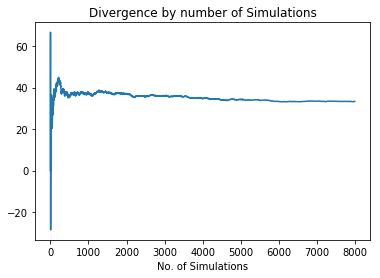

In [239]:
#Plot Divergence by number of Simulations
plt.plot(p_list) # plotting by columns
plt.xlabel('No. of Simulations')
plt.title('Divergence by number of Simulations')
plt.show()